<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/tp1_parte2_salarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
# from google.colab import files
# files.upload()

In [232]:
import pandas as pd

df = pd.read_csv("/content/sysarmy - encuesta.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 56 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                          --------------  -----  
 0   Dónde estás trabajando                                                                                                                                          5854 non-null   object 
 1   Tipo de contrato                                                                                                                                                5854 non-null   object 
 2   Salario mensual o retiro BRUTO (en tu moneda local)                                                                                 

In [233]:
#Salario BRUTO como float

import re
import numpy as np
df.rename(columns = {"Salario mensual o retiro BRUTO (en tu moneda local)" : "Salario mensual BRUTO ($)"}, inplace=True)

df["Salario mensual BRUTO ($)"] = df["Salario mensual BRUTO ($)"].str.extract('(\d+)', expand=False)
df["Salario mensual BRUTO ($)"] = pd.to_numeric(df["Salario mensual BRUTO ($)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 56 columns):
 #   Column                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                          --------------  -----  
 0   Dónde estás trabajando                                                                                                                                          5854 non-null   object 
 1   Tipo de contrato                                                                                                                                                5854 non-null   object 
 2   Salario mensual BRUTO ($)                                                                                                           

# VISUALIZACION 1 - OK

In [234]:
df.rename(columns = {"¿Tuviste ajustes por inflación durante 2021?":"Ajustes por inflación durante el 2021"}, inplace=True)
df = df[["Salario mensual BRUTO ($)", "Ajustes por inflación durante el 2021"]]
df

,Salario mensual BRUTO ($),Ajustes por inflación durante el 2021
0,207000.0,Dos
1,130000.0,Tres
2,185000.0,Uno
3,70000.0,No
4,90000.0,No
...,...,...
5849,280000.0,No
5850,60000.0,Dos
5851,440000.0,Uno
5852,59500.0,Dos


In [235]:
df["Ajustes por inflación durante el 2021"].unique()

array(['Dos', 'Tres', 'Uno', 'No', 'Más de tres'], dtype=object)

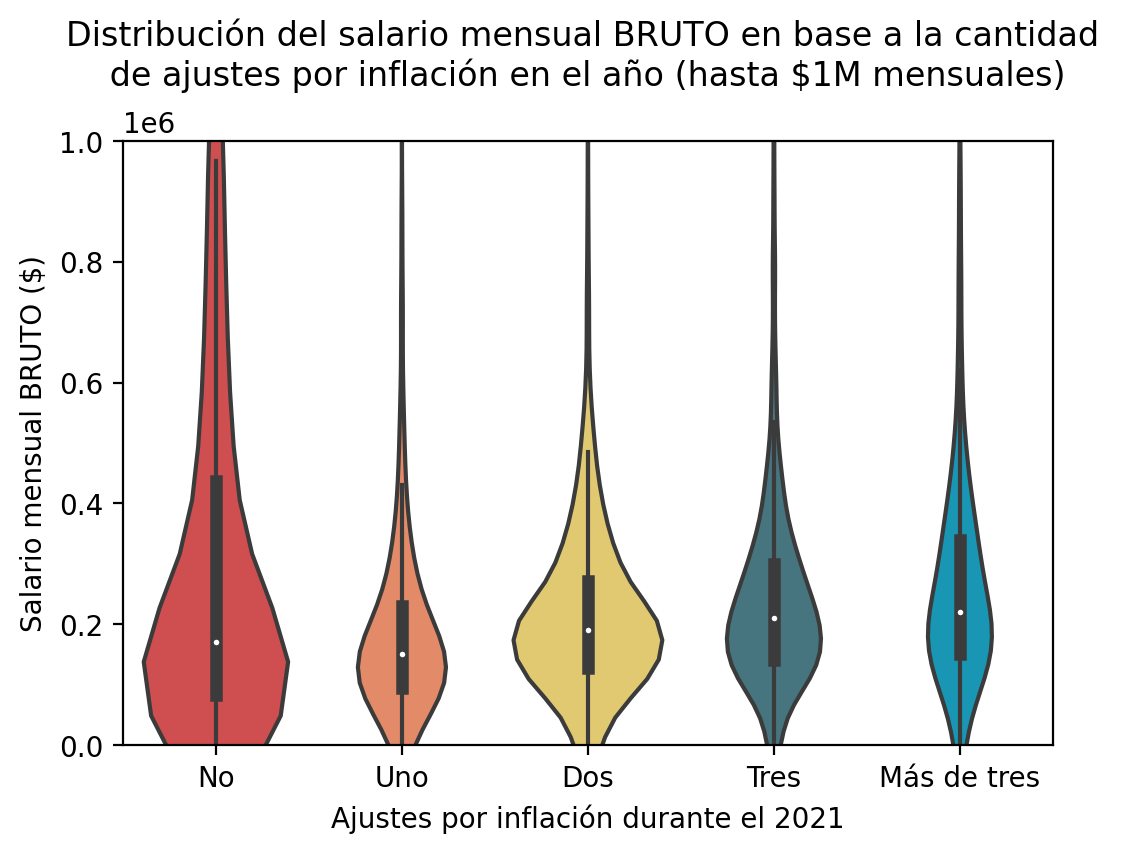

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# colors = ["#86bbd8","#00a5cf", "#33658a", "#3c7a89", "#f4d35e","#f6ae2d", "#f78154",  "#f26419", "#e5383b", "#b10f2e",  "#570000", "#372554" ]

palette = [ "#e5383b", "#f78154", "#f4d35e", "#3c7a89", "#00a5cf",]
plt.figure(dpi=200)
plt.ylim(top=1000000)
plt.title("Distribución del salario mensual BRUTO en base a la cantidad \n de ajustes por inflación en el año (hasta $1M mensuales) ", pad= 20)
sns.violinplot(data=df, x="Ajustes por inflación durante el 2021", y="Salario mensual BRUTO ($)", scale="count", order=["No", "Uno","Dos","Tres","Más de tres"], palette=palette)


# VISUALIZACION 2

In [237]:
df = pd.read_csv("/content/sysarmy - encuesta.csv")
df= df[["Trabajo de", "Años de experiencia", "Nivel de estudios alcanzado", "Tengo (edad)", "Salario mensual o retiro BRUTO (en tu moneda local)"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Trabajo de                                           5854 non-null   object 
 1   Años de experiencia                                  5854 non-null   float64
 2   Nivel de estudios alcanzado                          2944 non-null   object 
 3   Tengo (edad)                                         5854 non-null   int64  
 4   Salario mensual o retiro BRUTO (en tu moneda local)  5854 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 228.8+ KB


In [238]:
df["Nivel de estudios alcanzado"].unique()

array(['Universitario', nan, 'Terciario', 'Posdoctorado', 'Posgrado',
       'Doctorado', 'Secundario'], dtype=object)

In [239]:
def to_age_range(edad):
  
    if (edad in range (20, 25)):
      n = "20s"
    elif (edad in range (25, 30)):
      n = "25s"
    elif (edad in range (30, 35)):
      n = "30s"
    elif (edad in range (35, 40)):
      n = "35s"
    elif (edad in range (40, 45)):
      n = "40s"
    elif (edad in range (45, 50)):
      n = "45s"
    elif (edad in range (50, 55)):
      n = "50s"
    else:
      n = "Outlier"

    return n


In [240]:
def to_expertise(años):
  
    if (años in range (0, 2)):
      n = "Junior (0 - 2)"
    elif (años in range (2, 3)):
      n = "Advanced Junior (2 - 3)"
    elif (años in range (3, 5)):
      n = "Competent (3 - 5)"
    elif (años in range (5, 7)):
      n = "Proficient (5 - 7)"
    elif (años > 7):
      n = "Expert (>7)"
    else:
      n = "Outlier"

    return n

In [241]:
df["Tengo (edad)"] = df["Tengo (edad)"].map(lambda x: to_age_range(x))
df["Años de experiencia"] = df["Años de experiencia"].map(lambda x: to_expertise(x))
df.rename(columns = {"Salario mensual o retiro BRUTO (en tu moneda local)" : "Salario mensual BRUTO ($)"}, inplace=True)
df["Salario mensual BRUTO ($)"] = df["Salario mensual BRUTO ($)"].str.extract('(\d+)', expand=False)
df["Salario mensual BRUTO ($)"] = pd.to_numeric(df["Salario mensual BRUTO ($)"])
df

,Trabajo de,Años de experiencia,Nivel de estudios alcanzado,Tengo (edad),Salario mensual BRUTO ($)
0,Technical Leader,Expert (>7),Universitario,30s,207000.0
1,Developer,Outlier,NaN,35s,130000.0
2,Developer,Advanced Junior (2 - 3),NaN,25s,185000.0
3,Developer,Proficient (5 - 7),NaN,30s,70000.0
4,QA / Tester,Junior (0 - 2),Terciario,25s,90000.0
...,...,...,...,...,...
5849,Developer,Competent (3 - 5),Universitario,20s,280000.0
5850,Developer,Junior (0 - 2),NaN,20s,60000.0
5851,QA / Tester,Advanced Junior (2 - 3),NaN,25s,440000.0
5852,Recruiter / HR,Junior (0 - 2),Universitario,30s,59500.0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trabajo de                   5854 non-null   object 
 1   Años de experiencia          5854 non-null   object 
 2   Nivel de estudios alcanzado  2944 non-null   object 
 3   Tengo (edad)                 5854 non-null   object 
 4   Salario mensual BRUTO ($)    5846 non-null   float64
dtypes: float64(1), object(4)
memory usage: 228.8+ KB


In [243]:
df = df.drop(df[df["Años de experiencia"] == "Outlier"].index)
df = df.drop(df[df["Tengo (edad)"] == "Outlier"].index)

In [244]:
df

,Trabajo de,Años de experiencia,Nivel de estudios alcanzado,Tengo (edad),Salario mensual BRUTO ($)
0,Technical Leader,Expert (>7),Universitario,30s,207000.0
2,Developer,Advanced Junior (2 - 3),NaN,25s,185000.0
3,Developer,Proficient (5 - 7),NaN,30s,70000.0
4,QA / Tester,Junior (0 - 2),Terciario,25s,90000.0
5,Networking,Expert (>7),NaN,50s,250000.0
...,...,...,...,...,...
5849,Developer,Competent (3 - 5),Universitario,20s,280000.0
5850,Developer,Junior (0 - 2),NaN,20s,60000.0
5851,QA / Tester,Advanced Junior (2 - 3),NaN,25s,440000.0
5852,Recruiter / HR,Junior (0 - 2),Universitario,30s,59500.0


In [245]:
df.rename(columns={"Tengo (edad)": "Edad"}, inplace=True)

Para la categorización se utilizo el dreyfus model:
[link text](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2887319/#:~:text=Dreyfus%20and%20Dreyfus%20(2%2C%203,competent%2C%20proficient%2C%20and%20expert.)

In [246]:
reorderlist = ["Junior (0 - 2)", "Advanced Junior (2 - 3)", "Competent (3 - 5)",  "Proficient (5 - 7)",  "Expert (>7)" ]

matriz = df.pivot_table(values="Salario mensual BRUTO ($)", index="Años de experiencia", columns='Edad')
matriz = matriz.reindex(reorderlist)
matriz

Edad,20s,25s,30s,35s,40s,45s,50s
Años de experiencia,,,,,,,
Junior (0 - 2),98432.816092,112735.656885,138336.823529,134753.023529,98382.545455,141349.909091,74876.250000
Advanced Junior (2 - 3),184113.193548,187083.578125,169430.149606,224816.370370,173396.117647,385017.500000,195000.000000
Competent (3 - 5),233308.563910,245962.660326,223708.826840,193129.822581,275366.047619,257049.000000,425000.000000
Proficient (5 - 7),275778.971429,308262.966102,275087.422131,223970.561798,238088.594595,135965.818182,70200.000000
Expert (>7),660300.000000,375586.221053,396969.360153,344155.421348,336764.839709,316068.509653,292793.342593


Text(0.5, 1.0, 'Correlación entre Años de experiencia y Edad para el salario mensual BRUTO')

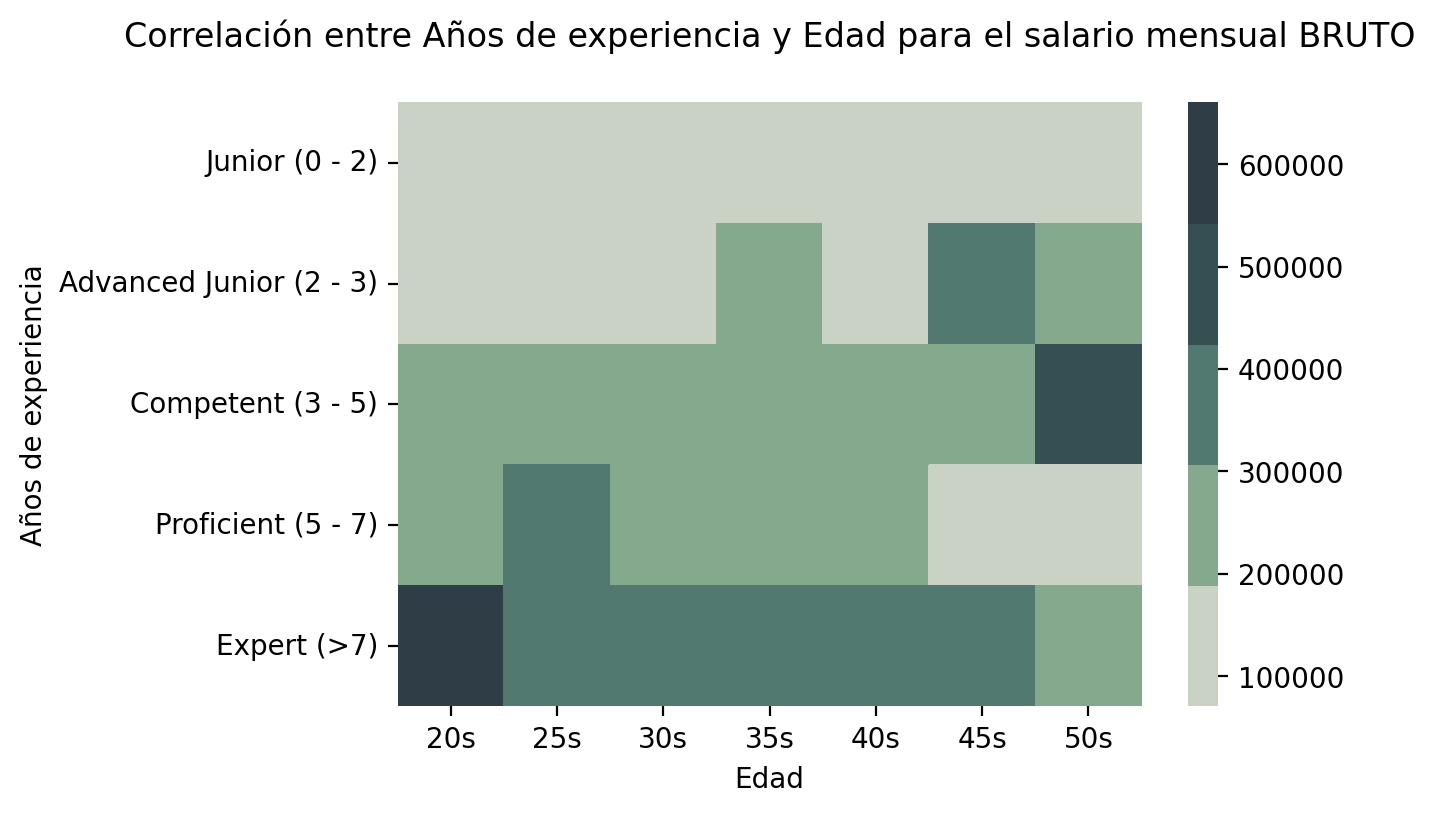

In [247]:
colors = ["#cad2c5","#84a98c","#52796f","#354f52","#2f3e46"]

plt.figure(dpi=200)
sns.heatmap(matriz, cmap=colors)
plt.title("Correlación entre Años de experiencia y Edad para el salario mensual BRUTO", pad= 20)